<h1 style="font-family:verdana;"> <center>Customer Segmentation using K-Means, DBSCAN, and Agglomerative Clustering</center> </h1>

>Retail analytics is concerned with understanding customer behavior in order to optimize operations strategically. Mall customer segmentation categorizes customers based on basic information about them in order to tailor marketing and improve the shopping experience.

>📌 **Goal:** We begin with an in-depth Exploratory Data Analysis (EDA), in which we use visualization tools to reveal the dataset's complexities. By gaining insights into the behaviors and characteristics of mall customers, We prepare to use the **K-Means clustering**, **DBSCAN**, and **Agglomerative clustering techniques**. This will allow us to categorize and understand our customer base more effectively.

**To begin, let's delve into understanding Hierarchical clustering as an unsupervised learning technique.**
<br><br>
Hierarchical clustering is a data mining and statistics technique that groups data points according to similarities. It falls under unsupervised learning, which involves grouping data without predefined labels. The technique is part of a larger family of clustering algorithms that includes connectivity-based, centroid-based, distribution-based, and density-based methods.

* Connectivity-based clustering, such as hierarchical clustering, groups data points based on their connectivity. 
* Centroid-based clustering, such as K-Means and K-Mode clustering, organizes data around centroids.
* Distribution-based clustering, such as Gaussian Mixture Models (GMM), creates clusters using statistical distributions. 
* Density-based clustering, such as DBSCAN, finds clusters based on high-density regions.

Hierarchical clustering groups similar data points together based on distance or similarity, generating a dendrogram to visualize hierarchical relationships. 

It provides two methods: 

1. **Agglomerative Clustering:** also known as the bottom-up approach, begins with individual data points and merges them into clusters.
2. **Divisive Clustering:** This is the inverse of agglomerative clustering; it starts with a single cluster and divides it into smaller ones.

Hierarchical clustering has the advantage of not requiring a predefined number of clusters. Instead, analysts can use the dendrogram to determine the best clustering solution based on the height at which distinct clusters emerge.

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns 
import plotly as py
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.graph_objs as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d 
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

# Data Exploration

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Visualization

### Histograms

>Histograms show the distribution of continuous data as bars.

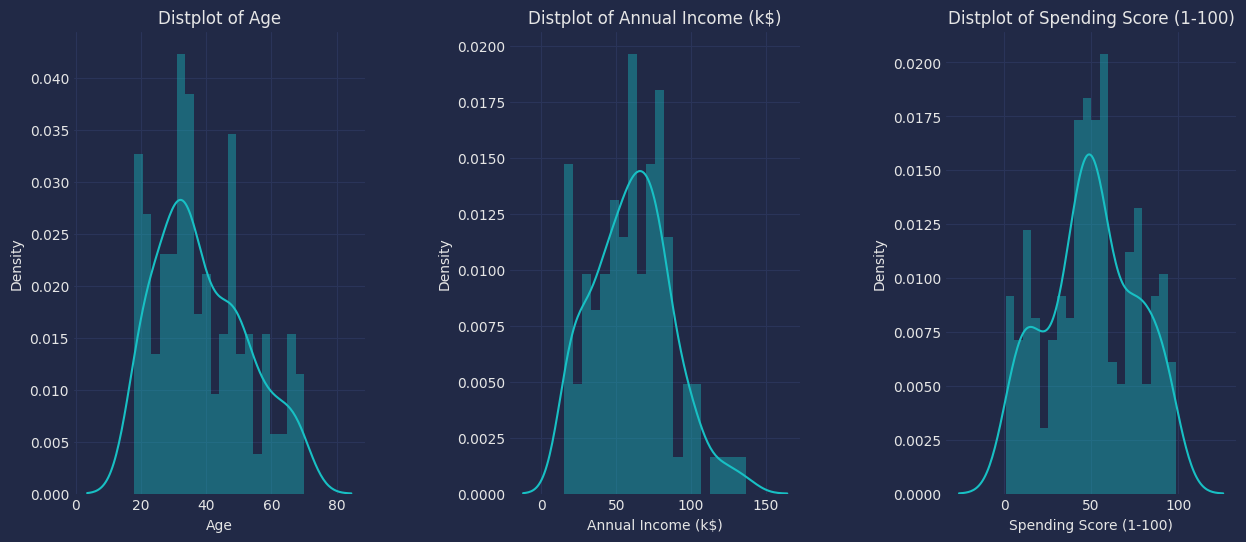

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot & Pie Chart of Gender
>These to chart Show the number of observations in each category of a categorical variable.

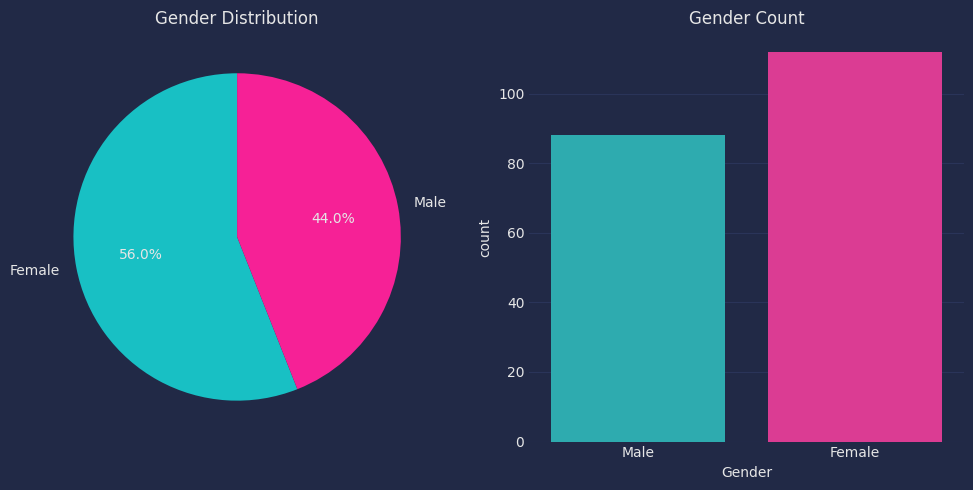

In [8]:
# Plotting the pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

# Plotting the count plot
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Gender')
plt.title('Gender Count')
plt.xlabel('Gender')

plt.tight_layout()
plt.show()

### Pairplot

>Pairplot: Shows the pairwise relationships between variables in a dataset by visualizing scatter plots for each pair of continuous variables and histograms for each variable's diagonal distribution. It is useful in detecting patterns, correlations, and outliers in multivariate data.

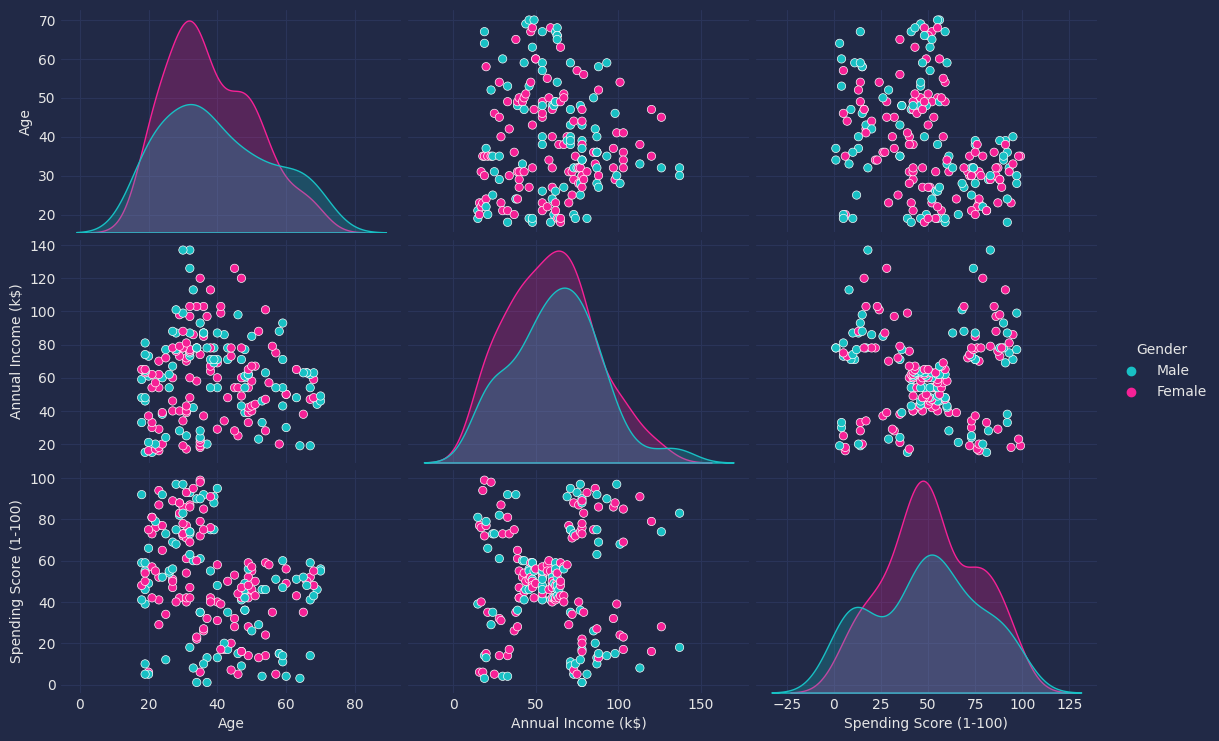

In [9]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

### Regplot
>A regplot shows the relationship between two continuous variables using a regression line.

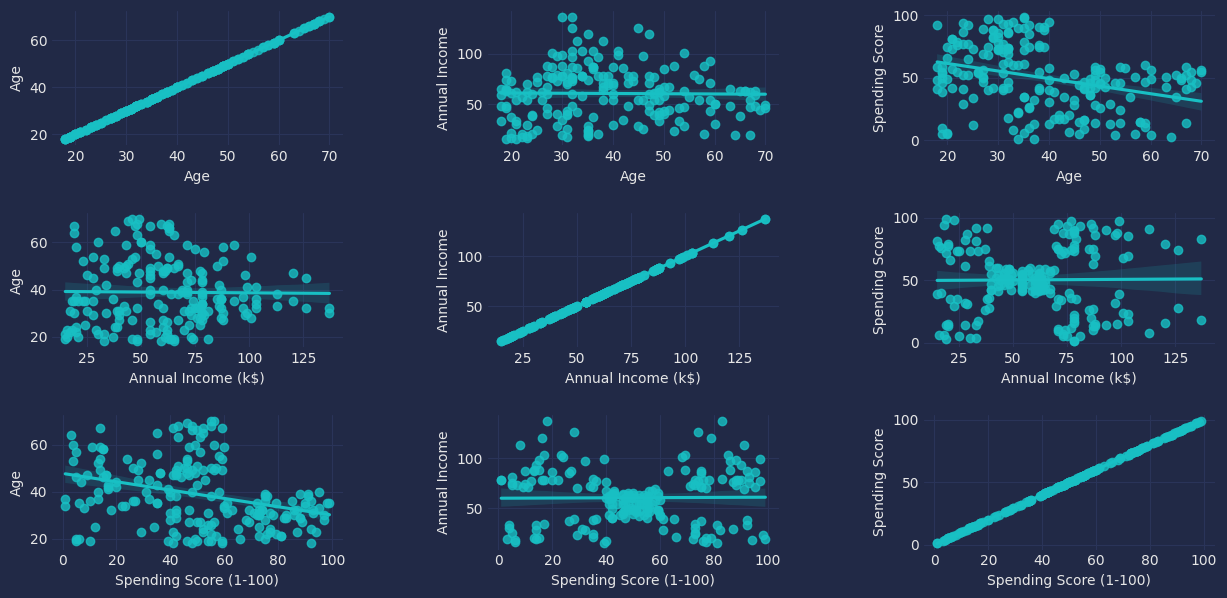

In [10]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### Barplot
>A barplot illustrates the average or aggregate value of a numerical variable for each category.

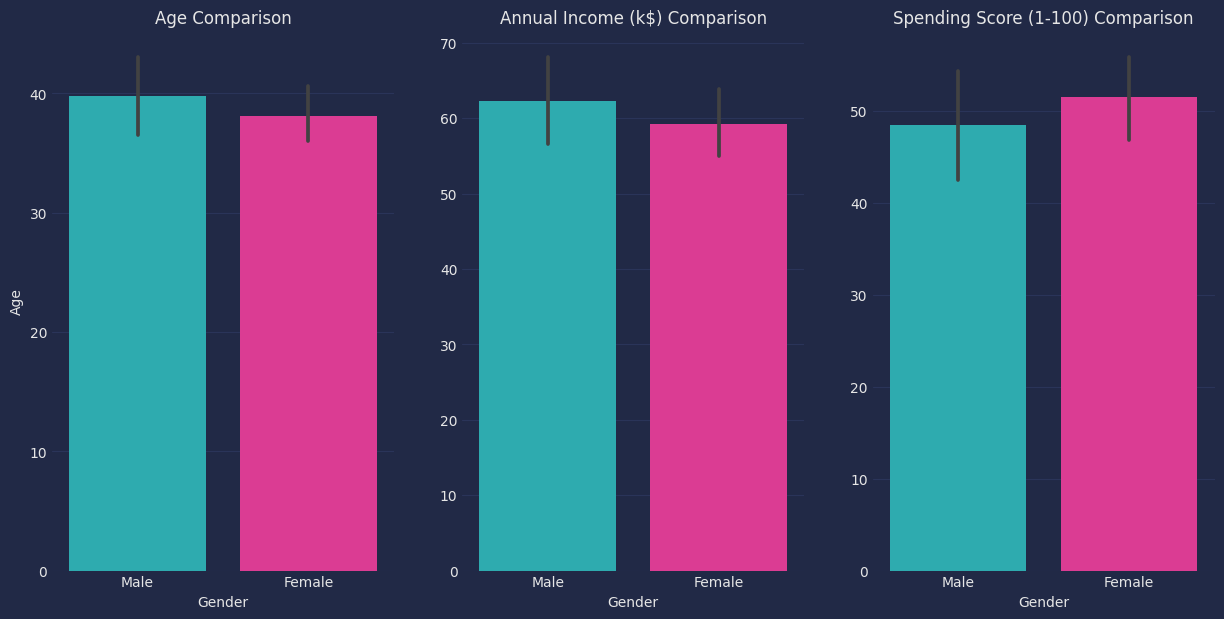

In [11]:
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Gender', y=col, data=df)
    plt.title(f'{col} Comparison')
    plt.ylabel(col if i == 1 else '')
plt.show()

### Pointplot
>A pointplot represents the mean or aggregate value of a numerical variable for each category as a series of points.

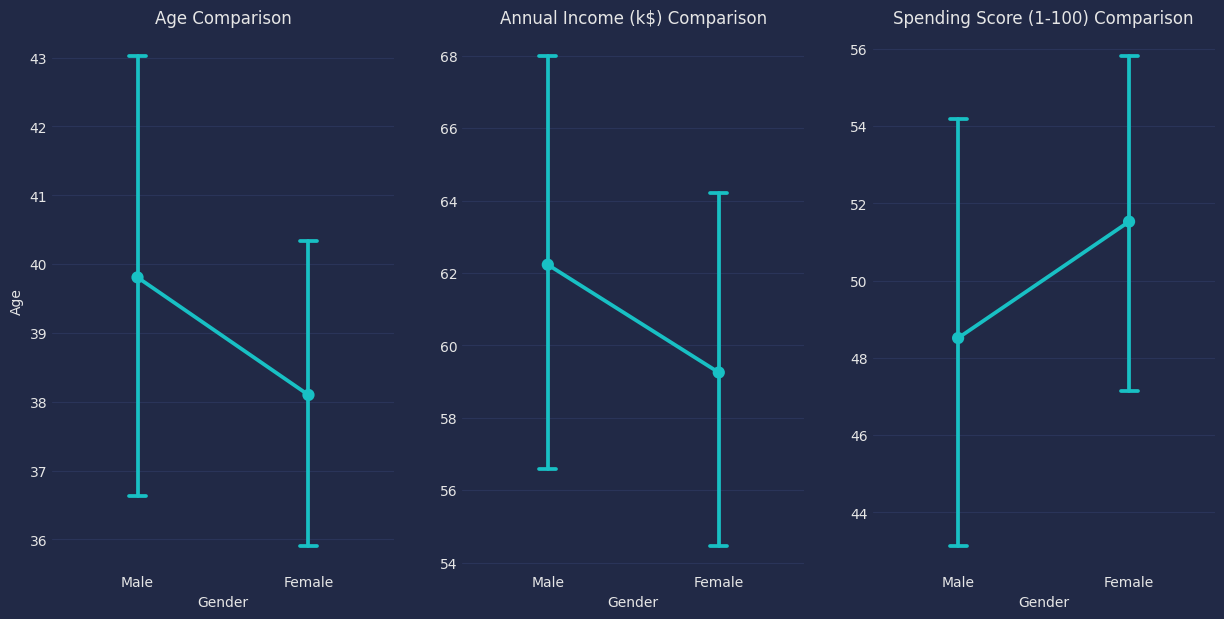

In [12]:
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.pointplot(x='Gender', y=col, data=df, capsize=0.1)
    plt.title(f'{col} Comparison')
    plt.ylabel(col if i == 1 else '')
plt.show()

### Violin Plots with Swarmplots

>**Violinplot** Uses kernel density and box plots to visualize the distribution of a continuous variable or groups. And **Swarmplot** is a categorical scatter plot that displays individual data points without overlap. A swarmplot is frequently used to display individual data points on top of a boxplot or violin plot.

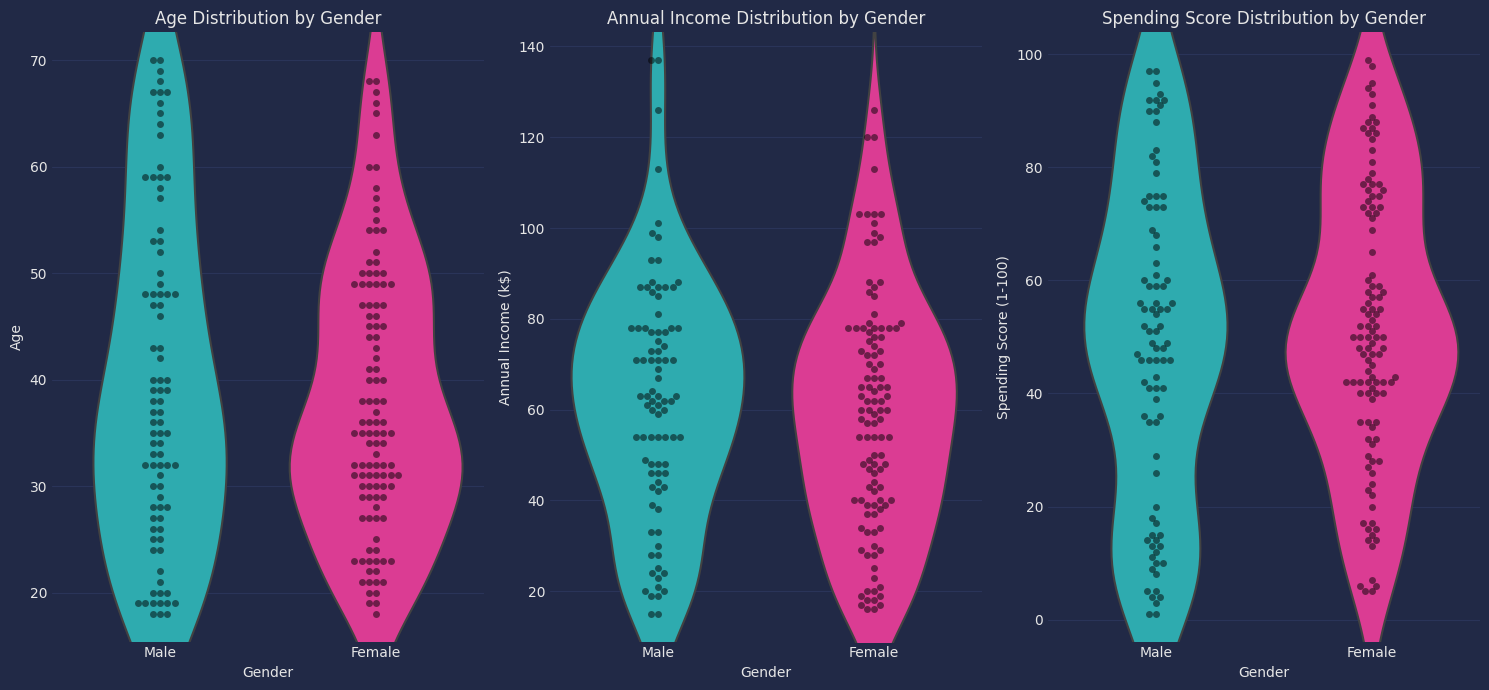

In [13]:
plt.figure(figsize=(15, 7))

# Vertical Violin plot and Swarm plot for Age
plt.subplot(1, 3, 1)
sns.violinplot(y='Age', x='Gender', data=df, inner=None)
sns.swarmplot(y='Age', x='Gender', data=df, color='k', alpha=0.5)
plt.title('Age Distribution by Gender')

# Vertical Violin plot and Swarm plot for Annual Income
plt.subplot(1, 3, 2)
sns.violinplot(y='Annual Income (k$)', x='Gender', data=df, inner=None)
sns.swarmplot(y='Annual Income (k$)', x='Gender', data=df, color='k', alpha=0.5)
plt.title('Annual Income Distribution by Gender')

# Vertical Violin plot and Swarm plot for Spending Score
plt.subplot(1, 3, 3)
sns.violinplot(y='Spending Score (1-100)', x='Gender', data=df, inner=None)
sns.swarmplot(y='Spending Score (1-100)', x='Gender', data=df, color='k', alpha=0.5)
plt.title('Spending Score Distribution by Gender')

plt.tight_layout()
plt.show()

## Clustering Evaluation and Visualization Functions

In [14]:
def evaluate_kmeans_clustering(X):
    
    sse = {}
    sil = []
    kmax = 10
    
    fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

    # Elbow Method :
    plt.subplot(1,2,1)
    for k in range(2, 11):
        kmeans = KMeans(n_clusters = k ,init='k-means++' ,random_state= 42  , algorithm='elkan').fit(X)
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
    plt.title('Elbow Method')
    plt.xlabel("k : Number of cluster")
    plt.ylabel("Sum of Squared Error")

    # Silhouette Score Method
    plt.subplot(1,2,2)
    for k in range(2, kmax + 1):
        kmeans = KMeans(n_clusters = k).fit(X)
        labels = kmeans.labels_
        sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    sns.lineplot(x = range(2,kmax + 1), y = sil);
    plt.title('Silhouette Score Method')
    plt.xlabel("k : Number of cluster")
    plt.ylabel("Silhouette Score")
    plt.show()

In [15]:
def silhouette_analysis_kmeans(n_clusters, X, first_feature, second_feature):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters = n_clusters ,init='k-means++' ,random_state= 42  , algorithm='elkan').fit(X)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    
    # Compute the Davies-Bouldin index to measure 
    # the average "similarity" between each cluster and its most similar cluster.

    silhouette_avg = silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels) # Davies-Bouldin index
    
    print(
        "\nFor n_clusters = ",
        n_clusters,
        ", the silhouette score is %.4f" % silhouette_avg,
        " and the Davies-Bouldin Index is %.4f \n" % db_index,
    )
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.cool(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    # 2nd Plot showing the actual clusters formed
    colors = cm.cool(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=250, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(first_feature)
    ax2.set_ylabel(second_feature)

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )


plt.show()

In [16]:
def silhouette_analysis_other(algorithm, n_clusters, X, first_feature, second_feature):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    if algorithm == 'AgglomerativeClustering':
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric= 'euclidean', linkage='ward').fit(X)
    else:
        clusterer = DBSCAN(eps=10, min_samples=3).fit(X)
    
    
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    
    # Compute the Davies-Bouldin index to measure 
    # the average "similarity" between each cluster and its most similar cluster.

    silhouette_avg = silhouette_score(X, cluster_labels)
    db_index = davies_bouldin_score(X, cluster_labels) # Davies-Bouldin index
    
    print(
        "\nFor n_clusters = ",
        n_clusters,
        ", the silhouette score is %.4f" % silhouette_avg,
        " and the Davies-Bouldin Index is %.4f \n" % db_index,
    )
    
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.cool(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.cool(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=250, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(first_feature)
    ax2.set_ylabel(second_feature)

    plt.suptitle(
        f"Silhouette analysis for {algorithm} on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.figure(figsize=(16,6))
    dendrogram = shc.dendrogram(shc.linkage(X, method = 'ward'))

    plt.title('Dendrogram', fontsize=20)
    plt.xlabel('Customers', fontsize=18)
    plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

In [17]:
def plot_3D_scatter(X):
    
    # Create KMeans object and fit the data
    kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=42, algorithm='elkan')
    kmeans.fit(X)

    # Get labels for each data point
    labels = kmeans.labels_

    # Plotting the 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract data points
    x = np.array(df['Annual Income (k$)'])
    y = np.array(df['Spending Score (1-100)'])
    z = np.array(df['Age'])

    # Plot data points colored by Spending Score
    ax.scatter(x, y, z, c=y, cmap='viridis')

    # Set labels and title
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.set_zlabel('Age')
    plt.title('Spending Score (1-100) vs Annual Income (k$) vs Age')

    # Set axes limits
    ax.set_xlim([df['Annual Income (k$)'].min(), df['Annual Income (k$)'].max()])
    ax.set_ylim([df['Spending Score (1-100)'].min(), df['Spending Score (1-100)'].max()])
    ax.set_zlim([df['Age'].min(), df['Age'].max()])

    plt.show()


# K- means Clustering 

### K- means

K-Means Clustering is an unsupervised machine learning algorithm that groups unlabeled datasets into clusters. The goal is to divide the data points into groups in which the items in each group are more similar than those in other groups. The **'K'** in K-Means denotes the number of clusters we want to identify. 

**The algorithm works as follows:**
1. We begin by randomly initializing K points known as cluster centroids.
2. Each data point is then assigned to the nearest cluster centroid based on similarity , which is typically calculated using Euclidean distance.
3. The cluster centroids are updated by recalculating their positions using the average of the data points assigned to each cluster.
4. Steps 2 and 3 are repeated for a specified number of iterations, or until the centroids do not change significantly.
5. At the end of the process, we have clusters, with each data point assigned to one of the K clusters.

The initial cluster centroids can be set at random or using specific criteria, such as random data points or values within the dataset's boundaries.

<code>clusterer = KMeans(n_clusters = n_clusters ,init='k-means++' ,random_state= 42  , algorithm='elkan').fit(X)</code>

This line of code sets up a KMeans clustering algorithm and configures it with parameters such as the number of clusters, initialization method, and algorithm choice ('elkan' in this case). This configuration is then used in the silhouette_analysis_kmeans function to analyze the data and display the clustering results using silhouette analysis.

**Evaluation metrics**

* The silhouette score gives the average value for all the samples. This gives a perspective into the density and separation of the formed
    
* Compute the Davies-Bouldin index to measure the average "similarity" between each cluster and its most similar cluster.


<h3> <center>Age and Spending Score Segmentation</center> </h3>

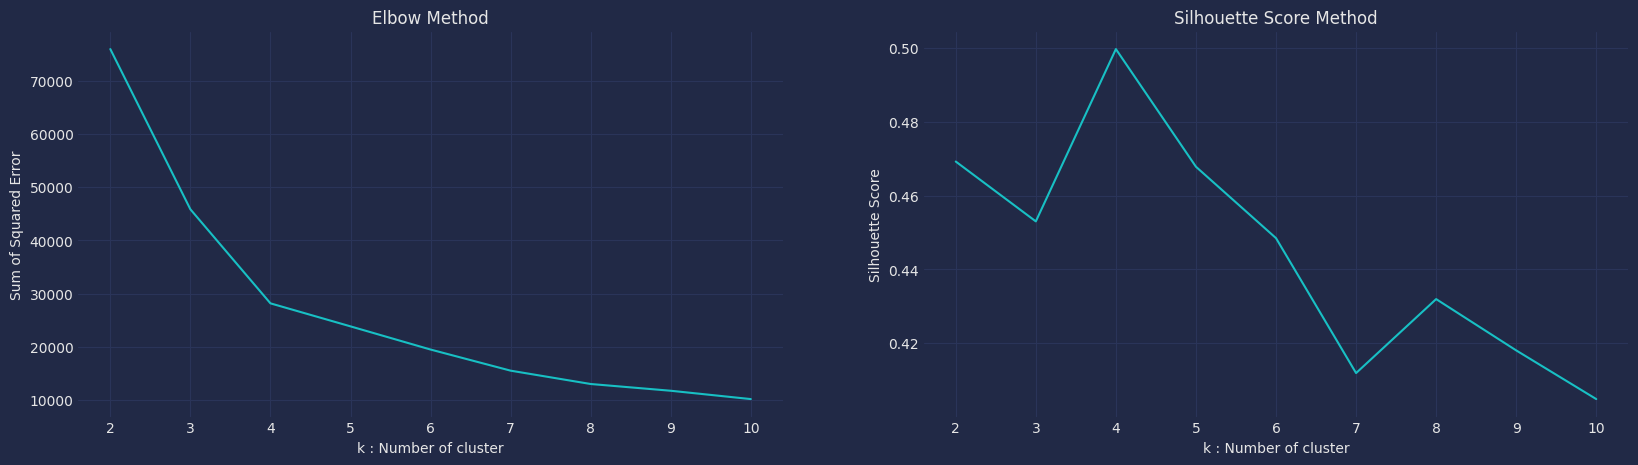


For n_clusters =  4 , the silhouette score is 0.4997  and the Davies-Bouldin Index is 0.6869 



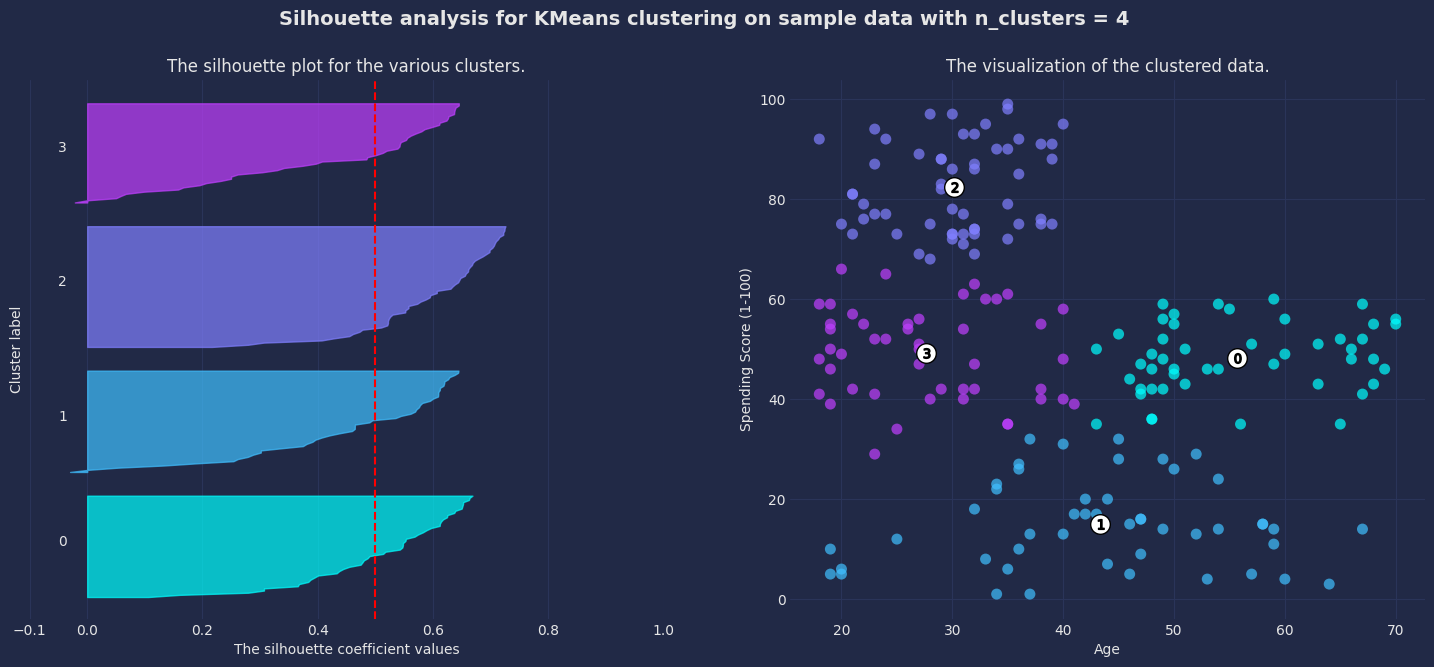

In [18]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

evaluate_kmeans_clustering(X1)
silhouette_analysis_kmeans(4 , X1, 'Age', 'Spending Score (1-100)')


**Segmentation Analysis: Age and Spending Score**

* The elbow method analysis suggests that 4 clusters are appropriate. 
* The silhouette score, which indicates the quality of clustering, is 0.4997 for four clusters, confirming their effectiveness. 
* The Davies-Bouldin Index, which measures cluster separation, is 0.6869, providing additional support for clustering quality. 
* Furthermore, the silhouette plots have a consistent thickness across clusters, indicating relatively uniform cluster sizes.

<h3> <center>Age and Annual Income Segmentation</center> </h3>

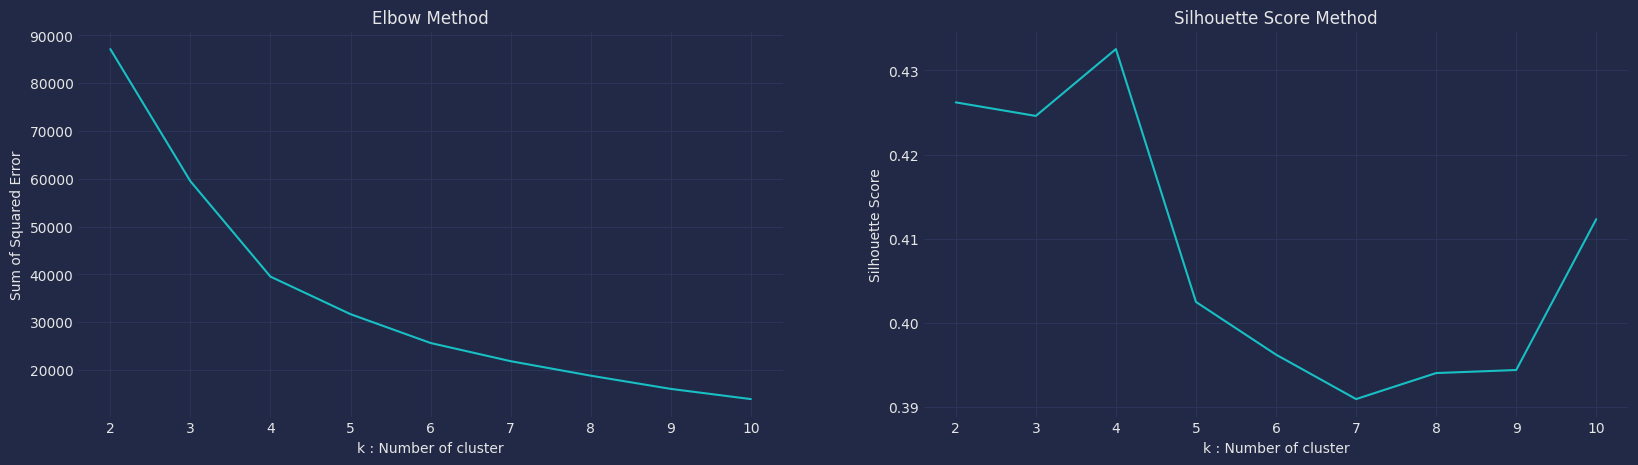


For n_clusters =  4 , the silhouette score is 0.4330  and the Davies-Bouldin Index is 0.7696 



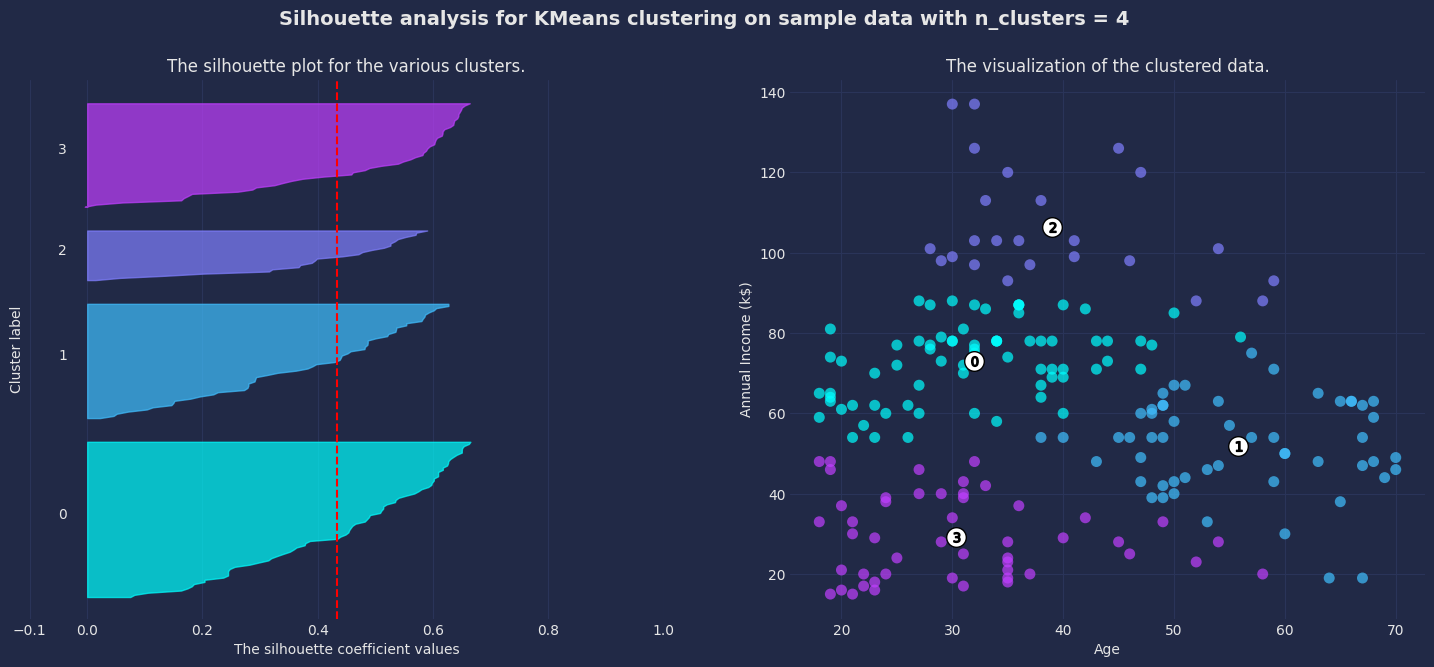

In [19]:
X2 = df[['Age' , 'Annual Income (k$)']].iloc[: , :].values

evaluate_kmeans_clustering(X2)
silhouette_analysis_kmeans(4, X2, 'Age' , 'Annual Income (k$)')


**Segmentation Analysis: Age and Annual Income**

* The analysis reveals that 4 clusters are most suitable in this segmentation . 
* The silhouette score is highest for this configuration, indicating good cohesion and separation. 
* However, the Davies-Bouldin Index, which measures cluster similarity and separation, shows moderate cluster quality. 
* The silhouette plots show that three clusters have consistent thickness, whereas one appears thinner, indicating a potential imbalance.

<h3> <center>Annual Income and Spending Score Segmentation</center> </h3>

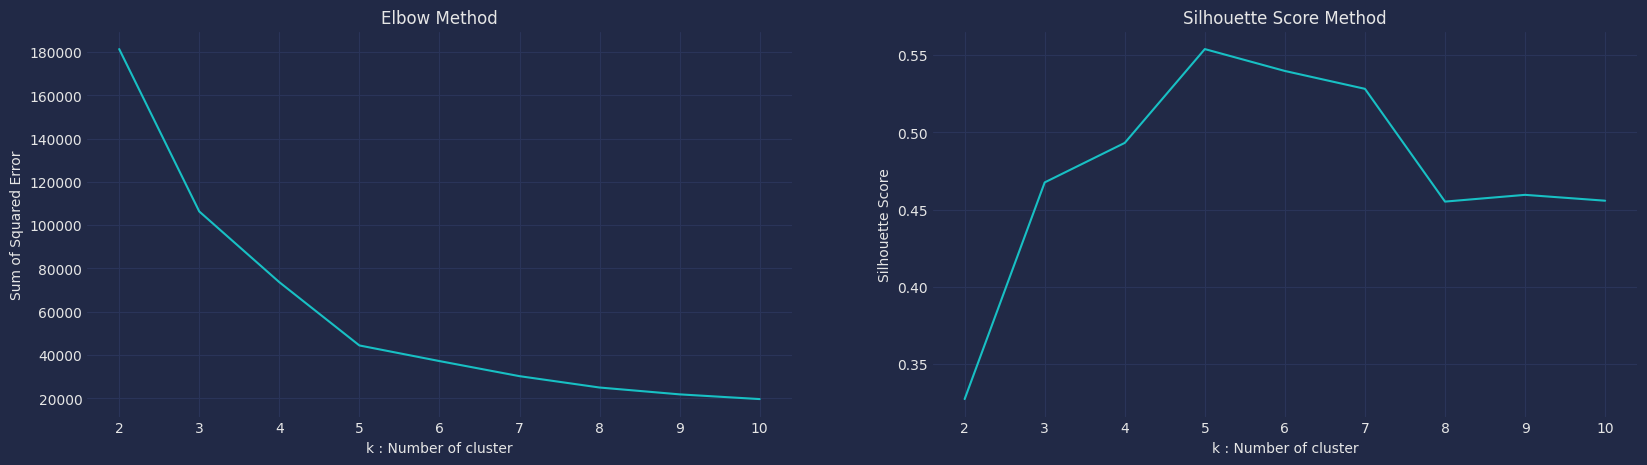


For n_clusters =  5 , the silhouette score is 0.5539  and the Davies-Bouldin Index is 0.5726 



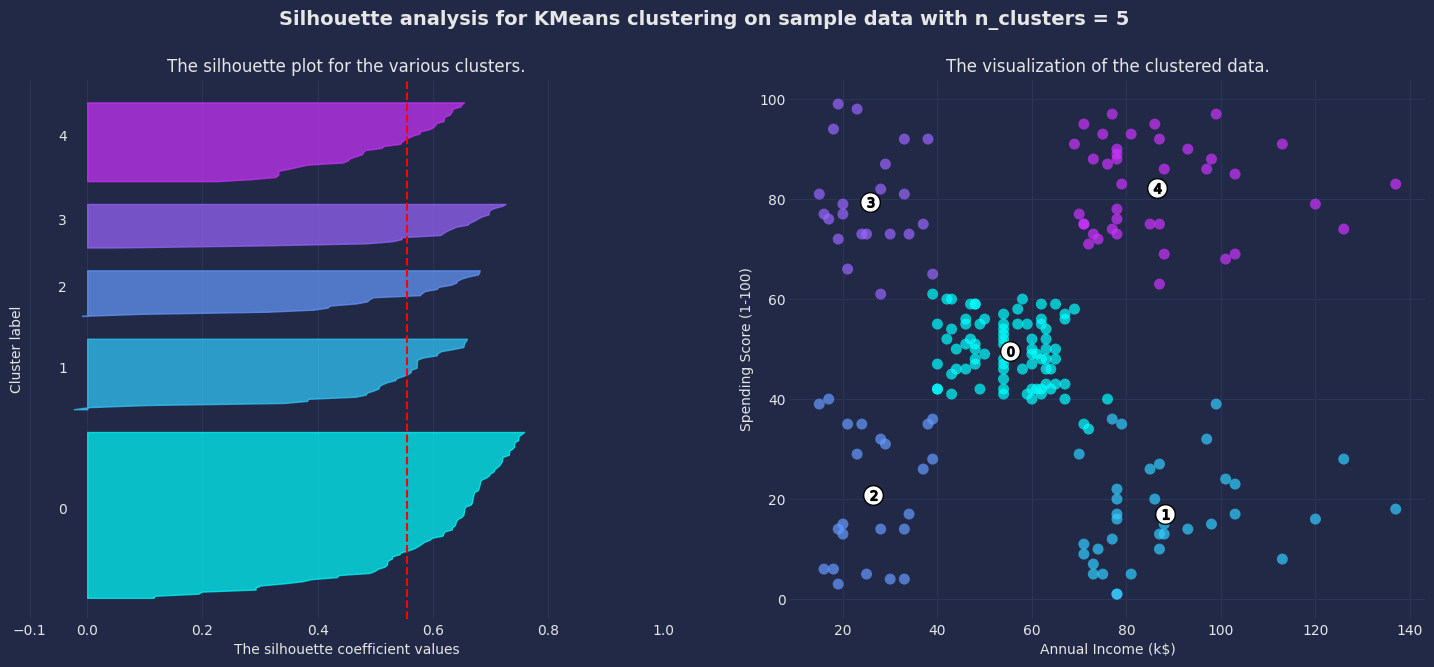

In [20]:
X3 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

evaluate_kmeans_clustering(X3)
silhouette_analysis_kmeans(5 , X3, 'Annual Income (k$)' , 'Spending Score (1-100)')


**Segmentation Analysis: Annual Income and Spending Score**

* The elbow chart suggests 5 clusters, while the silhouette score chart shows the highest value for 5 clusters.
* With n_clusters = 5, the silhouette score is 0.5539, indicating a reasonable separation between clusters, and the Davies-Bouldin Index is 0.5726, indicating high cluster quality.
* The silhouette plots show consistent thickness across 4 clusters, with one slightly thicker than the others, but overall the clustering appears reasonable.

# Agglomerative Hierarchical Clustering

Agglomerative Clustering is a hierarchical clustering technique that treats each data point as a single cluster and then merges pairs of clusters until only one remains. This method is based on the bottom-up approach, which involves iteratively combining clusters based on their similarity or proximity.

Importance of Parameters

* **Distance Metric ('metric'):** Determines how similarity between clusters is measured. The distance metric is commonly set to **'euclidean'**.

* **Linkage Criteria ('linkage'):** Determines the merging strategy, which influences cluster shapes and sizes. For example, **'Ward'** linkage minimizes variance when merging clusters, resulting in more compact and spherical clusters.

Furthermore, the number of clusters is an important parameter in Agglomerative Clustering, which can be controlled using **dendrogram** visualization or the **'distance_threshold'** parameter. Users can specify the maximum distance at which clusters are merged using the 'distance_threshold' parameter, which effectively controls the clustering granularity.

<code>clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric= 'euclidean', linkage='ward').fit(X)</code>

this line of code initializes the Agglomerative Clustering algorithm by specifying the number of clusters (n_clusters), distance metric (metric), and linkage criterion (linkage). This code is used in the silhouette_analysis_other function.


For n_clusters =  5 , the silhouette score is 0.5530  and the Davies-Bouldin Index is 0.5782 



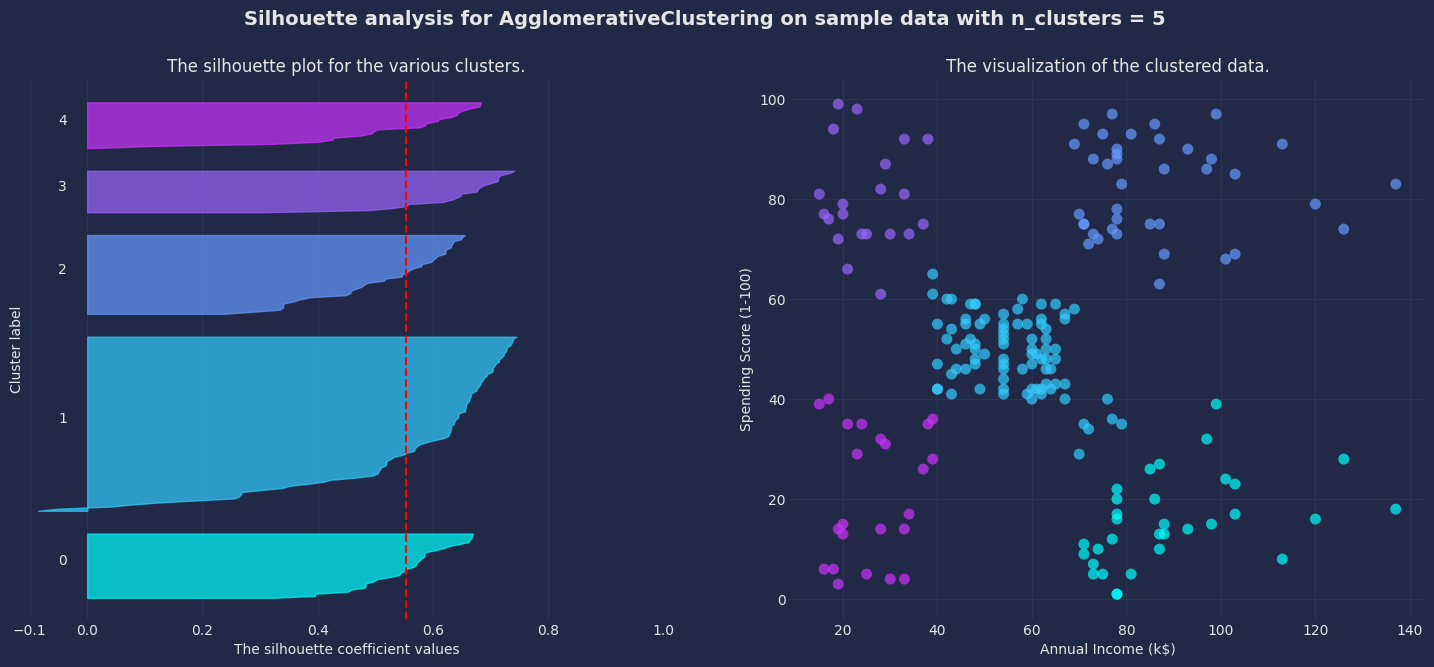

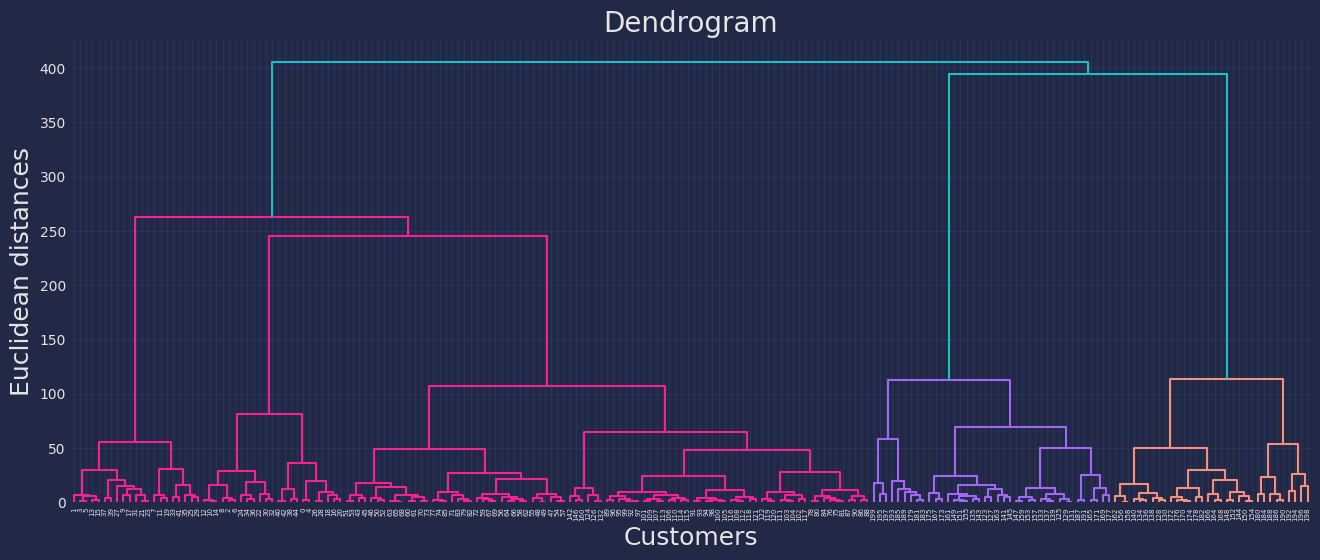

In [21]:
silhouette_analysis_other('AgglomerativeClustering', 5, X3, 'Annual Income (k$)' , 'Spending Score (1-100)')

**Segmentation Analysis using Agglomerative Clustering: Annual Income and Spending Score**

* With n_clusters = 5, the silhouette score is 0.5530, showing that clusters are reasonably separated, and the Davies-Bouldin Index is 0.5782, indicating high cluster quality.
* The silhouette plots have consistent thickness across four clusters, with one being slightly thicker, but the clustering appears to be reasonable overall.
* In the dendrogram, the threshold level for identifying the ideal number of clusters based on Euclidean distance is found to be around 120 of 400.

# DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a method that identifies dense regions separated by areas with lower point density. Clusters in DBSCAN are defined as points within a neighborhood radius that contain at least one point. 

Two important parameters in DBSCAN are:

* **eps:** The maximum distance between two samples for one to be considered in the neighborhood of the other.
* **min_samples:** The minimum number of samples in a neighborhood for a point to be designated as a core point.

The selection of these parameters has a significant impact on the effectiveness of DBSCAN. eps controls the size of the neighborhood, which influences cluster density, whereas min_samples controls the cluster's robustness by determining the minimum number of points required to form a dense region. Fine-tuning these parameters is critical for achieving the best clustering results.

<code>clusterer = DBSCAN(eps=10, min_samples=3).fit(X)</code>

This line of code initializes the DBSCAN algorithm with parameters for distance (eps) and minimum samples (min_samples). these parameters are adjusted through trial and error to optimize clustering. This code segment is utilized within the silhouette_analysis_other function.


For n_clusters =  4 , the silhouette score is 0.3627  and the Davies-Bouldin Index is 0.7540 



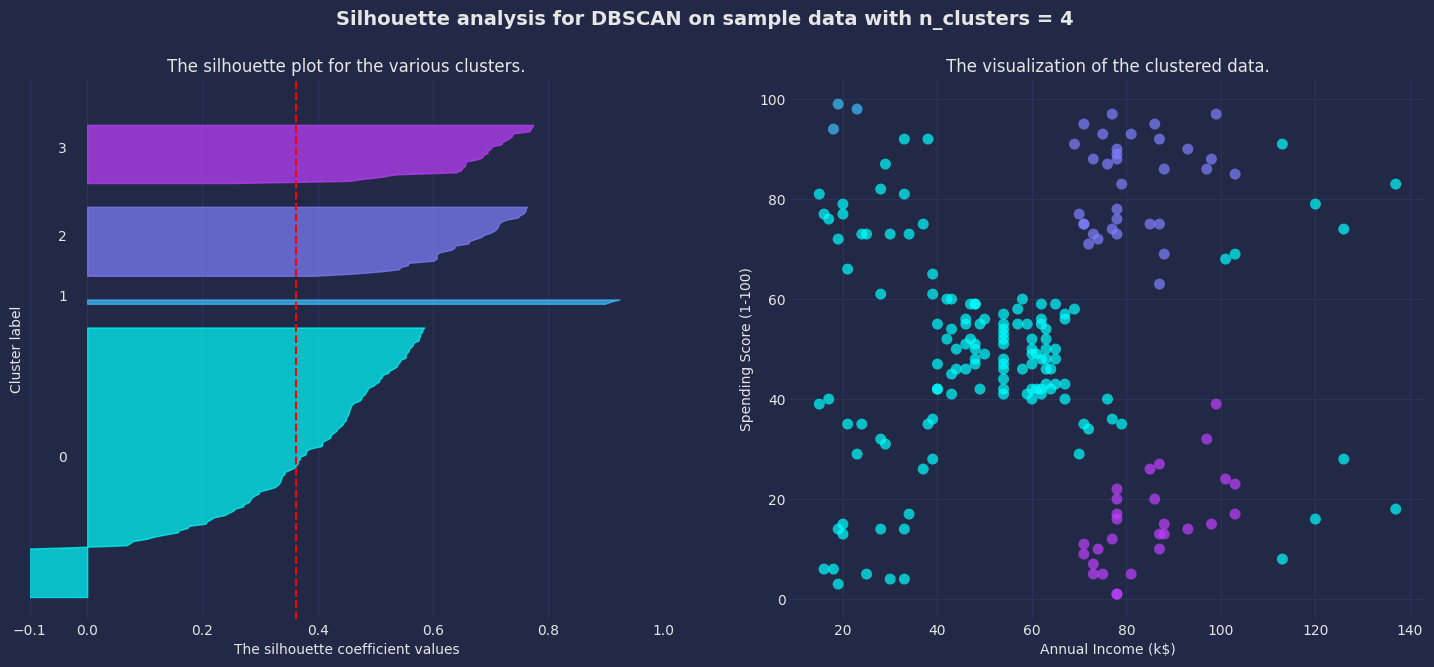

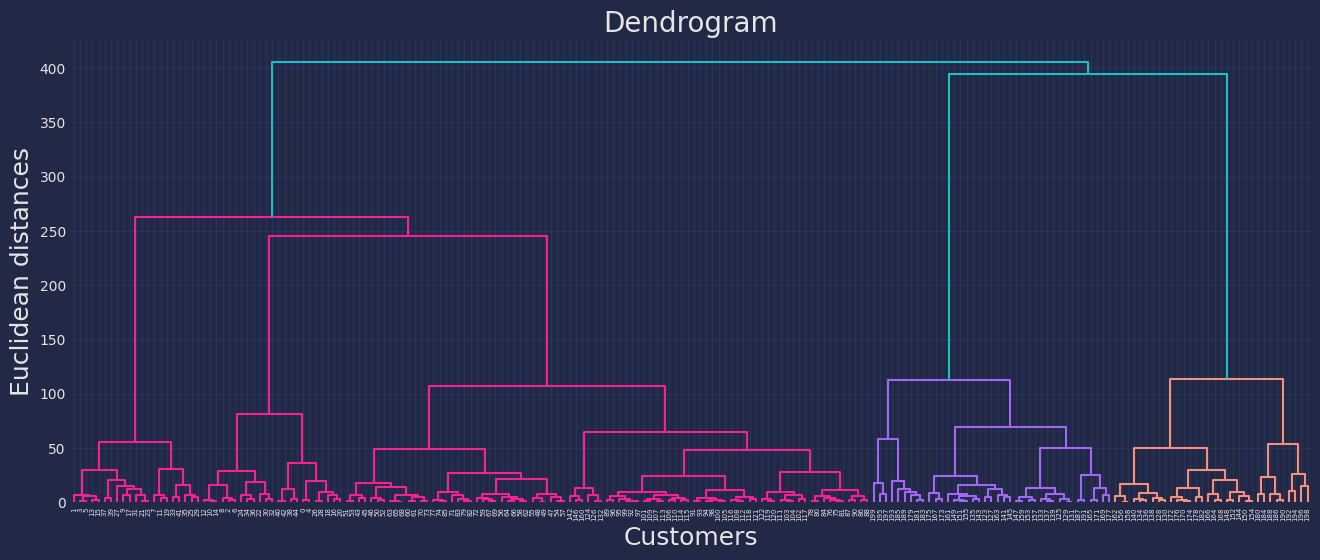

In [22]:
silhouette_analysis_other('DBSCAN',4 ,X3, 'Annual Income (k$)' , 'Spending Score (1-100)')

**Segmentation Analysis using DBSCAN: Annual Income and Spending Score**

* With n_clusters = 4, the silhouette score is 0.3627, indicating a modest separation between clusters. However, the Davies-Bouldin Index is 0.7540, suggesting suboptimal cluster quality. 
* The scatter plot shows that the algorithm does not adequately fit the data, with one large cluster and several small ones.
* The thickness of clusters in silhouette plots varies, indicating that cluster sizes are inconsistent.
* The dendrogram's threshold level for determining the optimal number of clusters based on Euclidean distance is approximately 260 out of 400.

# KMeans for segmenting based on Age, Annual Income, and Spending Score

<h3> <center>Age, Annual Income, and Spending Score segmentation</center> </h3>

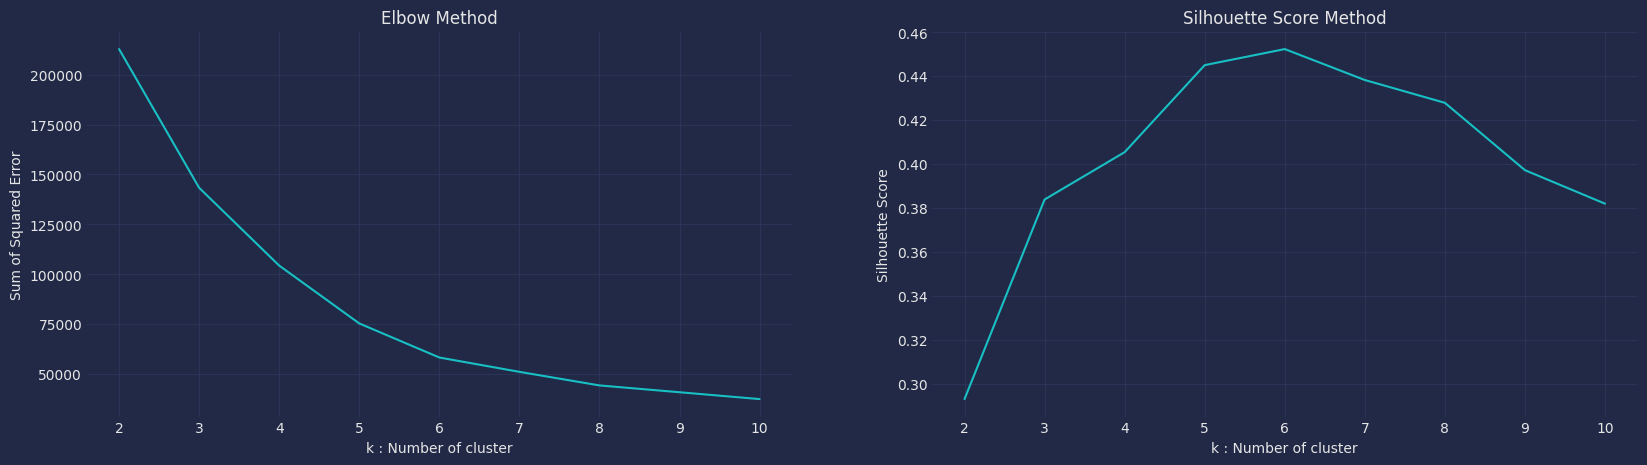


For n_clusters =  6 , the silhouette score is 0.4524  and the Davies-Bouldin Index is 0.7443 



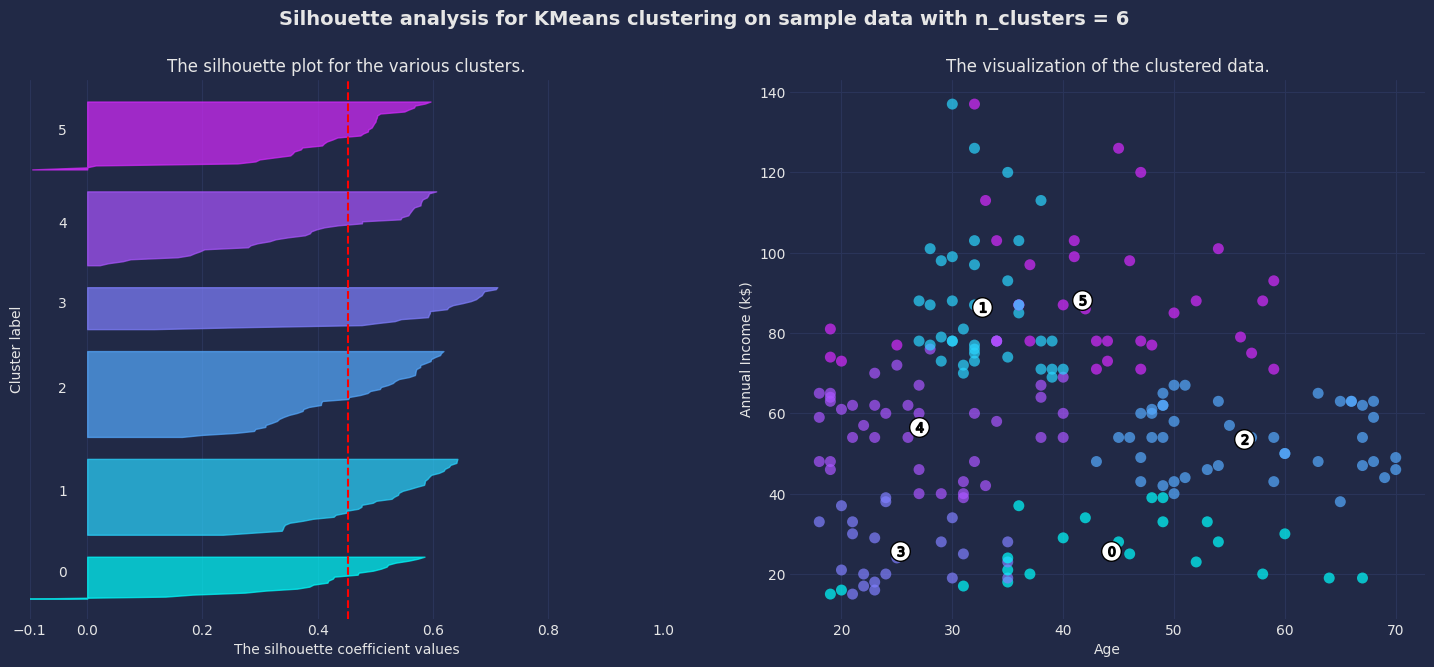

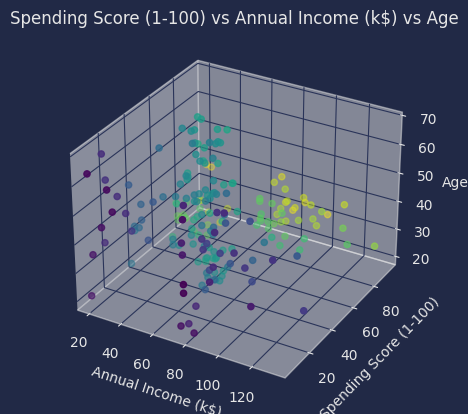

In [23]:
X4 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values

evaluate_kmeans_clustering(X4)
silhouette_analysis_kmeans(6 , X4, 'Age' , 'Annual Income (k$)')
plot_3D_scatter(X4)

**Segmentation Analysis using KMeans: Age , Annual Income and Spending Score**
* The elbow point is not clearly visible on the elbow chart, but the silhouette score peaks at 6 clusters.
* With n_clusters = 6, the silhouette score is 0.4524, showing a moderate separation between clusters, and the Davies-Bouldin Index is 0.7443, indicating acceptable cluster quality.
* The thickness of clusters in the silhouette plots varies, but they all have a relatively consistent size.
* Overall, the analysis indicates that six clusters provide a reasonable data segmentation.

# 3D Plot

In [24]:
kmeans = (KMeans(n_clusters = 6 ,init='k-means++' ,max_iter=300,  random_state= 42  , algorithm='elkan') )
kmeans.fit(X4)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df['label'] = labels

# Define trace for Scatter3d plot
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['label'],  
        colorscale='Viridis', 
        size=5,
        line=dict(
            color='darkblue', 
            width=1.5
        ),
        opacity=0.8
    )
)

data = [trace1]


# Layout configuration
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income'),
    )
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


# Conclusion

>KMeans segmentation for Annual Income and Spending Score shown to be the most effective model, with significant cluster separation and good quality (silhouette score: 0.5539, Davies-Bouldin Index: 0.5726). Agglomerative Clustering produced comparable results but lagged significantly behind KMeans in performance measurements. DBSCAN demonstrated suboptimal cluster quality and separation, making it less suitable for this dataset. As a result, for mall consumer segmentation, KMeans clustering based on Annual Income and Spending Score remains the recommended method due to its robust and interpretable results.

<center style="font-size:18px; color:#005A9C;">I hope you found value and insights in this notebook. If you have any suggestions, please feel free to share them. If you enjoyed the content, consider giving it an upvote.</center>

<h1><center>Thank You!</center></h1>